<a href="https://colab.research.google.com/github/ahmedshahrukhali/sedna-exercise/blob/main/CampaignEmails.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SEDNA Exercise 

We are working with a dataset of Emails from Canadian Federal Political Parties.
This dataset can be accessed in multiple formats. For this exercise we will use the XML format as it is a more general purpose format and has strong support built in to Python.

This exercise will demonstrate some of the various methods possible for extracting useful information from the data, as well as protection of private and sensitive data.

While there are more emails available in this data, to improve understandability of both the processes and the information, we are working with the Donation Subscription half of the set.

A data frame with each of the mentions, (&date / sending-party)
Weekly aggregate of the data / plot time frequency of mentions (split by party.)
Etc. (i.e. if you want to do something else with these emails)


In [ ]:
!python -m spacy download en_core_web_sm
import pandas as pd
import numpy as np
import spacy
from spacy import displacy
import datetime

Above are the libraries used to perform some of the tasks in this exercise.
- Pandas is a common library used for data analysis and manipulation. It is particularly useful for it's efficient data structures.
- SpaCy is a power Natural Language Processing (NLP) library used for various textual understanding processes. For this exercise's purpose the Named Entity Recognition will allow advanced functions to be applied to the data. 

In [ ]:

tree1 = ET.parse('PE-Conservatives-Donation-Subscription.xml') 
root1 = tree1.getroot()

tree2 = ET.parse('PE-GreenParty-Donation-Subscription.xml') 
root2 = tree2.getroot()

tree3 = ET.parse('PE-Liberal-Donation-Subscription.xml') 
root3 = tree3.getroot()

tree4 = ET.parse('PE-NDP-Donation-Subscription.xml') 
root4 = tree4.getroot()


Here the call to the Python module ElementTree (ET) enables parsing of the XML information. This will enable access to the email body text, as well as all other information present in the dataset. 

In [ ]:
#text
sampletext = "http://www.conservative.ca Speech from Prime Minister Stephen Harper: My fellow Canadians, for the second time this week there has been a brutal and violent attack on our soil. Today, our thoughts and prayers are with the family and friends of Corporal Nathan Cirillo of the Argyll and Sutherland Highlanders. Corporal Cirillo was killed today - murdered in cold blood - as he provided a ceremonial honour guard at Canada’s national war memorial. That sacred place that pays tribute to those who gave their lives so that we can live in a free, democratic and safe society. Likewise, our thoughts and prayers remain also with the family and friends of Warrant Officer Patrice Vincent, who was killed earlier this week by an ISIL-inspired terrorist. Tonight we also pray for the speedy recovery of the others injured in these despicable attacks. Fellow Canadians, we have also been reminded today of the compassionate and courageous nature of so many Canadians, like those private citizens and first responders who came to provide aid to Corporal Cirillo as he fought for his life. And, of course, the members of our security forces in the RCMP, the city of Ottawa police, and in parliament who came quickly, and at great risk to themselves, to assist those of us who were close to the attack. Fellow Canadians, in the days to come, we will learn more about the terrorist and any accomplices he may have had. But this week’s events are a grim reminder that Canada is not immune to the types of terrorist attacks we have seen elsewhere around the world. We are also reminded that attacks on our security personnel and our institutions of governance are, by their very nature, attacks on our country. On our values, on our society, on us, Canadians, as a free and democratic people who embrace human dignity for all. But let there be no misunderstanding, we will not be intimidated. Canada will never be intimidated. In fact, this will lead us to strengthen our resolve and redouble our efforts and those of our national security agencies, to take all necessary steps to identify and counter threats, and keep Canada safe here at home. Just as it will lead us to strengthen our resolve and redouble our efforts to work with our allies around the world and fight against the terrorist organizations who brutalize those in other countries with the hope of bringing their savagery to our shores. They will have no safe haven. While today has been, without question, a difficult day, I have every confidence that Canadians will pull together with the kind of firm solidarity that has seen our country through many challenges. Together, we will remain vigilant against those, at home or abroad, who wish to harm us. For now, Laureen, Ben, Rachel, and I join all Canadians in praying for those touched by today’s attack. May God bless them, and keep our land glorious and free. This email was sent to: conservativeemail@mikesmit.com We believe email is an important way to stay in touch with Canadians. If you no longer wish to receive e-mail updates from us, click here (http://conservative.us5 .list-manage1.com/unsubscribe?u=5e9ee09d91aa4d38e08f9a7c3&id=4cbef4752f&e=625dba58d8& c=d8e9a53917) to unsubscribe. Email communications from: Conservative Party of Canada 1204-130 Albert St Ottawa, ON K1P 5G4 Canada "

#from dataframe
#sample2=  df.text[1]

#from xml
sample3 = root1[10][5].text


#######################################################
#CHANGE THE DEFINITION OF SAMPLE TO SEE MORE EXAMPLES
sample = sampletext
#######################################################

nlp = spacy.load("en_core_web_sm")
doc = nlp(sample)
displacy.render(doc, style="ent", jupyter=True)


Three different methods to pass the information to NLP module.
- Direct, as a string
- From our DataFrame (which will be created later on so it might help understanding to come back and uncomment the line to see it run)
- XML, accessing the element of the XML containing the email body is also possible

# SpaCy
As mentioned, SpaCy is an advanced NLP library. Using it's smallest set of tags, we are able to find and label all the nouns in this dataset. SpaCy is also available in many other languages. The output of the above cell demonstrates SpaCy's ability to tag all the Named Entities, distinguishing people from places, organizations, and more.

# Function - Redacting Names *(Requirement 1)*

In [ ]:
def replace_person_names(token):
    if token.ent_iob != 0 and token.ent_type_ == 'PERSON':
        return '[REDACTED] '
    return token.string

def redact_names(nlp_doc):
    for ent in nlp_doc.ents:
        ent.merge()
    tokens = map(replace_person_names, nlp_doc)
    return ''.join(tokens)

The two functions defined above are called below in an example. These functions together take account of all the Named Entities found using SpaCy, and selecting only those tagged as 'Person' hide the name.

This use can be extended to protect various other Entites, such as Email Addresses, Countries, Organizations, and much more.

In [ ]:
survey_doc = nlp(sample)
redact_names(survey_doc)

'http://www.conservative.ca Speech from Prime Minister [REDACTED] : My fellow Canadians, for the second time this week there has been a brutal and violent attack on our soil. Today, our thoughts and prayers are with the family and friends of Corporal [REDACTED] of the Argyll and [REDACTED] . Corporal [REDACTED] was killed today - murdered in cold blood - as he provided a ceremonial honour guard at Canada’s national war memorial. That sacred place that pays tribute to those who gave their lives so that we can live in a free, democratic and safe society. Likewise, our thoughts and prayers remain also with the family and friends of Warrant Officer [REDACTED] , who was killed earlier this week by an ISIL-inspired terrorist. Tonight we also pray for the speedy recovery of the others injured in these despicable attacks. Fellow Canadians, we have also been reminded today of the compassionate and courageous nature of so many Canadians, like those private citizens and first responders who came 

The example above shows the same email shown earlier, with no more names.

This demonstration of NER may have a small output here, but the uses and applications of programmatically 'understanding' the WHO in an unstructured text, enables data privacy, as well as providing a method to obtain deep meaning about all parties involved from the data. 

# DataFrame *(Requirement 2)*

In [ ]:

def file_parser(root):
  

  subjects=[]
  receivedDate=[]
  receivedTime=[]
  fromName = []
  fromEmail = []
  toName = []
  toEmail = []
  messageId = []
  text = []
  rawHeader = []
  for each in root.findall('./message'):
      
      subject = each.find('.//subject')
      subjects.append(subject.text)

      for one in each.findall('.//received'):
          rd = one.find('.//date')
          receivedDate.append(rd.text)
          rt = one.find('.//time')
          receivedTime.append(rt.text)

      for one in each.findall('.//from'):
          fn = one.find('.//name')
          fromName.append(fn.text)
          fe = one.find('.//email')
          fromEmail.append(fe.text)

      for one in each.findall('.//to'):
          tn = one.find('.//name')
          toName.append(tn.text)
          te = one.find('.//email')
          toEmail.append(te.text)
      
      mId = each.find('.//messageid')
      messageId.append(mId.text)

      txt = each.find('.//text')
      text.append(txt.text)

      rh = each.find('.//rawheader')
      rawHeader.append(rh.text)


  d={"subjects": subjects, "receivedDate": receivedDate, "receivedTime": receivedTime,"fromName": fromName,"fromEmail": fromEmail,"toName": toName,"toEmail": toEmail,"messageId": messageId,"text": text,"rawHeader": rawHeader}

  df=pd.DataFrame(d)

  df['newdate'] = df['receivedDate'].apply(lambda x: 
                                    datetime.datetime.strptime(x, '%Y%m%d').strftime('%d/%m/%y'))

  df['newdate'] = pd.to_datetime(df['newdate'])

  return (df)

A DataFrame is a ubiquitous modern data structure which allows high-speed processing of very large datasets. 

The function reads the 'child' elements of the XML file, which follow an identical structure, and writes the data as it reads to be coalesced to a DataFrame for easier and faster manipulation and understanding. 

In [ ]:
df1 = file_parser(root1)
df2 = file_parser(root2)
df3 = file_parser(root3)
df4 = file_parser(root4)

df1.head()

,subjects,receivedDate,receivedTime,fromName,fromEmail,toName,toEmail,messageId,text,rawHeader,newdate
0,Thank you,20140920,17:08:12,Jaime Girard,info@conservative.ca,Mike Smit,conservativeemail@mikesmit.com,631799045aa6807d7bfb07c16c16352c@donate.conser...,,\nX-GM-THRID: 1479800065528151604\nX-Gmail-Lab...,2014-09-20
1,Speech from Prime Minister Stephen Harper,20141023,02:58:06,Conservative Party of Canada,info@conservative.ca,conservativeemail@mikesmit.com,conservativeemail@mikesmit.com,5e9ee09d91aa4d38e08f9a7c3625dba58d8.2014102302...,http://www.conservative.ca\nSpeech from Prime ...,\nX-GM-THRID: 1482717885784771084\nX-Gmail-Lab...,2014-10-23
2,"Be one of the 2,000",20141030,00:00:27,"Jaime Girard, Conservative Party of Canada",info@conservative.ca,conservativeemail@mikesmit.com,conservativeemail@mikesmit.com,5e9ee09d91aa4d38e08f9a7c3625dba58d8.2014102923...,https://donate.conservative.ca/MembershipDrive...,\nX-GM-THRID: 1483343331261593976\nX-Gmail-Lab...,2014-10-30
3,Big news for families,20141031,01:59:24,"Erin O'Toole, MP",info@conservative.ca,conservativeemail@mikesmit.com,conservativeemail@mikesmit.com,5e9ee09d91aa4d38e08f9a7c3625dba58d8.2014103101...,http://www.conservative.ca/NewTaxBreaks/\nFrie...,\nX-GM-THRID: 1483442244091812200\nX-Gmail-Lab...,2014-10-31
4,Spooky!,20141031,21:54:27,Conservative Party of Canada,info@conservative.ca,conservativeemail@mikesmit.com,conservativeemail@mikesmit.com,5e9ee09d91aa4d38e08f9a7c3625dba58d8.2014103121...,https://donate.conservative.ca?mpi=c4864059e7&...,\nX-GM-THRID: 1483516104618222806\nX-Gmail-Lab...,2014-10-31


Using the function defined above, a DataFrame is created from each of the different datasets. It would be viable to concatenate these to 1 larger DataFrame with a single new column to identify the origins of the records.

# Visualization *(Requirement 3)*

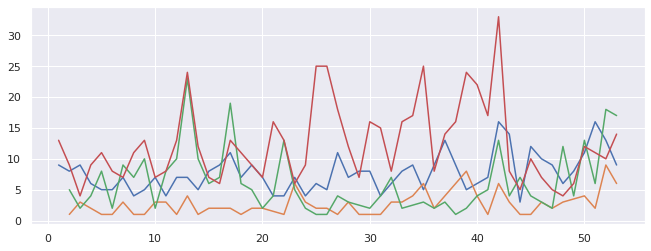

In [ ]:
(df1.loc[df1['newdate'].dt.year.between(2015, 2016), 'newdate']
         .dt.isocalendar().week
         .value_counts()
         .sort_index()
         .plot(kind="line")
)

(df2.loc[df2['newdate'].dt.year.between(2015, 2016), 'newdate']
         .dt.isocalendar().week
         .value_counts()
         .sort_index()
         .plot(kind="line")
)

(df3.loc[df3['newdate'].dt.year.between(2015, 2016), 'newdate']
         .dt.isocalendar().week
         .value_counts()
         .sort_index()
         .plot(kind="line")
)

(df4.loc[df4['newdate'].dt.year.between(2015, 2016), 'newdate']
         .dt.isocalendar().week
         .value_counts()
         .sort_index()
         .plot(kind="line")
         
)

The above graph shows the frequency of emails over the year of 2015 for each of the 4 Political Parties.

# Conclusion

In this exercise we were able to create valuable changes to a large dataset, as well as efficiently saving and manipulating the dataset to gain further value. This exercise serves as a tool to show the extensive possibilities of potential value in large sets of unstrctured data over a minimal period of time.

Like art, the (machine) learning process is never finished. Some things I would continue to improve would be:
- Modularization of the code to make it easier to make changes, fix bugs, and update
- Visualization, where a plethora of possibilities answer questions we may never think to ask.

Hopefully this notebook has been a net positive experience for you too. Don't hesitate contact me with any questions and suggestions.

# ***Stay Curious!***